### Logistic Regression Model - Fraud Detection 

In [92]:
import pandas as pd

df = pd.read_csv("fraud_eda.csv")

# Separating features by type
categorical_cols = ['customer','age','gender','zipcodeOri',
                    'merchant','zipMerchant','category',
                    'time_of_day','gender_new']
numeric_cols = ['step','amount','fraud','day','hour','Enterprise']

In [93]:
# Cleaning categorical values
for c in categorical_cols:
    df[c] = df[c].astype(str).str.strip().str.replace("'", "", regex=False)

In [94]:
# Count missing data per column
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

Series([], dtype: int64)


In [95]:
df.nunique()

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
day                8
hour              24
time_of_day        8
gender_new         3
Enterprise         2
dtype: int64

In [96]:
# Dropping unneeded columns
df = df.drop(columns=['hour', 'day', 'step', 'time_of_day','zipMerchant', 'zipcodeOri', 'customer','gender'])

In [97]:
df.shape[1]

7

### One-hot encode 'age', 'Gender', 'merchant', 'category'

In [98]:
# One-hot encode 'age'
df = pd.get_dummies(df, columns=['age'], prefix='AGE')
print(df.head())

      merchant           category  amount  fraud gender_new  Enterprise  \
0   M348934600  es_transportation    4.55      0          M           0   
1   M348934600  es_transportation   39.68      0          M           0   
2  M1823072687  es_transportation   26.89      0          F           0   
3   M348934600  es_transportation   17.25      0          M           0   
4   M348934600  es_transportation   35.72      0          M           0   

   AGE_0  AGE_1  AGE_2  AGE_3  AGE_4  AGE_5  AGE_6  AGE_U  
0  False  False  False  False   True  False  False  False  
1  False  False   True  False  False  False  False  False  
2  False  False  False  False   True  False  False  False  
3  False  False  False   True  False  False  False  False  
4  False  False  False  False  False   True  False  False  


In [99]:
df = pd.get_dummies(df, columns=['merchant'], prefix='MERCHANT')

In [100]:
df = pd.get_dummies(df, columns=['category'], prefix='MCC')

In [101]:
df = pd.get_dummies(df, columns=['gender_new'], prefix='GENDER')

In [102]:
#df = pd.get_dummies(df, columns=['time_of_day'], prefix='TOD')

In [103]:
print(df.head())

   amount  fraud  Enterprise  AGE_0  AGE_1  AGE_2  AGE_3  AGE_4  AGE_5  AGE_6  \
0    4.55      0           0  False  False  False  False   True  False  False   
1   39.68      0           0  False  False   True  False  False  False  False   
2   26.89      0           0  False  False  False  False   True  False  False   
3   17.25      0           0  False  False  False   True  False  False  False   
4   35.72      0           0  False  False  False  False  False   True  False   

   ...  MCC_es_leisure  MCC_es_otherservices  MCC_es_sportsandtoys  \
0  ...           False                 False                 False   
1  ...           False                 False                 False   
2  ...           False                 False                 False   
3  ...           False                 False                 False   
4  ...           False                 False                 False   

   MCC_es_tech  MCC_es_transportation  MCC_es_travel  \
0        False                   Tru

### Scaling Numerical Variables (Amount)

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['amount_scaled'] = scaler.fit_transform(df[['amount']])

# dropping amount column
df.drop(columns=['amount'], inplace=True)


In [105]:
df.head()

,fraud,Enterprise,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_U,...,MCC_es_otherservices,MCC_es_sportsandtoys,MCC_es_tech,MCC_es_transportation,MCC_es_travel,MCC_es_wellnessandbeauty,GENDER_F,GENDER_M,GENDER_U,amount_scaled
0,0,0,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,-0.299276
1,0,0,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0.016067
2,0,0,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,-0.098742
3,0,0,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,-0.185275
4,0,0,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,-0.019480


### Heatmap - Correlation Matrix

fraud            1.000000
amount_scaled    0.489967
Enterprise      -0.002512
Name: fraud, dtype: float64


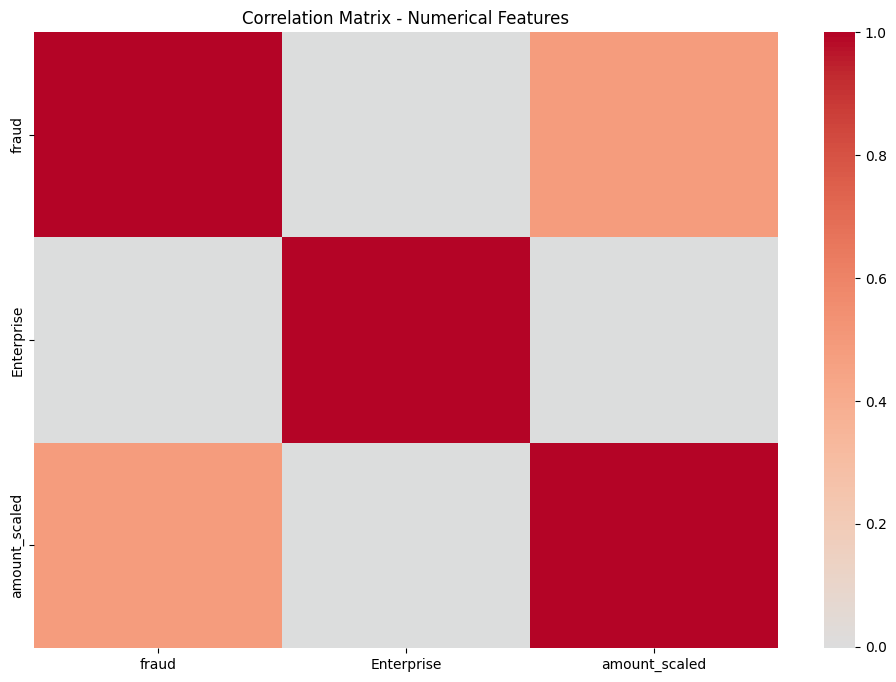

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# only numerical columns
num_df = df.select_dtypes(include=['int64','float64','int32'])

# Correlation matrix
corr = num_df.corr()
print(corr['fraud'].sort_values(ascending=False))

# Plotting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix - Numerical Features")
plt.savefig("Cor.png", dpi=300, bbox_inches="tight")

plt.show()

In [107]:
corr_with_target = df.corr()['fraud'].sort_values(ascending=False)
print(corr_with_target)

fraud                    1.000000
amount_scaled            0.489967
MERCHANT_M980657600      0.409547
MCC_es_sportsandtoys     0.363631
MERCHANT_M480139044      0.319556
                           ...   
MCC_es_food             -0.023793
GENDER_M                -0.025172
MERCHANT_M348934600     -0.080429
MERCHANT_M1823072687    -0.111596
MCC_es_transportation   -0.262973
Name: fraud, Length: 79, dtype: float64


In [108]:
fraud_counts = df['fraud'].value_counts()
print(fraud_counts)

fraud
0    587443
1      7200
Name: count, dtype: int64


### Splitting features & target  - Splitting Data Train - Test

In [109]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraud'])
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [110]:
print("Before SMOTE - Training set fraud counts:\n", y_train.value_counts())

Before SMOTE - Training set fraud counts:
 fraud
0    411210
1      5040
Name: count, dtype: int64


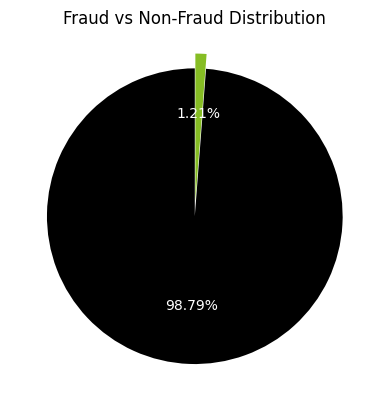

In [111]:
fraud_counts.plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=90,
    colors=['black', '#86bd24'],
    labels=['Non-Fraud (0)', 'Fraud (1)'],
    explode=(0, 0.1)  
)

plt.gca().set_ylabel("")  
for text in plt.gca().texts:
    text.set_color("white")
plt.title("Fraud vs Non-Fraud Distribution")
plt.ylabel("")  
plt.savefig("Target Distribution.png", dpi=300, bbox_inches="tight")

plt.show()


### OverSampling - SMOTE

In [112]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE - Training set fraud counts:\n", y_train_resampled.value_counts())

After SMOTE - Training set fraud counts:
 fraud
0    411210
1    411210
Name: count, dtype: int64


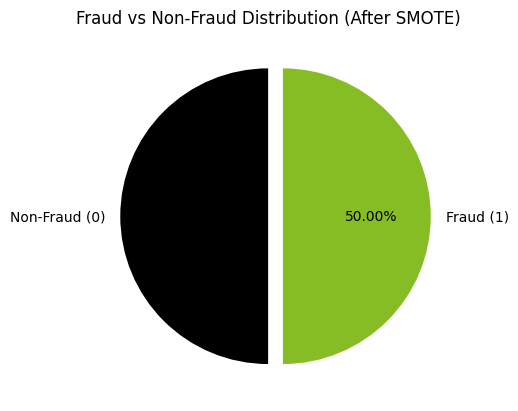

In [113]:
# Counting classes after SMOTE
fraud_counts_resampled = pd.Series(y_train_resampled).value_counts()

# pie chart
fraud_counts_resampled.plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=90,
    colors=['black', '#86bd24'],
    labels=['Non-Fraud (0)', 'Fraud (1)'],
    explode=(0, 0.1)  # highlight fraud slice
)

plt.title("Fraud vs Non-Fraud Distribution (After SMOTE)")
plt.savefig("After SMOTE.png", dpi=300, bbox_inches="tight")
plt.ylabel("")  # removes default y-axis label
plt.show()


In [114]:
y_test.value_counts()

fraud
0    176233
1      2160
Name: count, dtype: int64

### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression
lr = LogisticRegression(
    solver='liblinear',   
    penalty='l2',
    max_iter=2000
)

# Fitting data
lr.fit(X_train_resampled, y_train_resampled)

# Predictions on test set
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, lr_prob))


Confusion Matrix:
 [[171788   4445]
 [    52   2108]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.975     0.987    176233
           1      0.322     0.976     0.484      2160

    accuracy                          0.975    178393
   macro avg      0.661     0.975     0.735    178393
weighted avg      0.991     0.975     0.981    178393

ROC-AUC: 0.9972905266827943


In [116]:
import joblib
# Saveing model, scaler
joblib.dump(lr, "fraud_LR_model.joblib")
joblib.dump(scaler, "amount_scaler.joblib")

['amount_scaler.joblib']